# Network Intrusion Classifier

#### Define the goal and context

The goal of this competition is to detect the network intrusion attacks using several classifiers

This is the data set used for The Third International Knowledge Discovery and Data Mining Tools Competition, which was held in conjunction with KDD-99

About Data : KDD Cup is the annual Data Mining and Knowledge Discovery competition organized by ACM Special Interest Group on Knowledge Discovery and Data Mining, the leading professional organization of data miners. Year to year archives including datasets, instructions, and winners are available for most years.

#### Define success metrics

The evaluation metric for this competition is Mean F1-Score. The F1 score, commonly used in information retrieval, measures accuracy using the statistics precision p and recall r. Precision is the ratio of true positives (tp) to all predicted positives (tp + fp). Recall is the ratio of true positives to all actual positives (tp + fn).

The F1 metric weights recall and precision equally, and a good retrieval algorithm will maximize both precision and recall simultaneously. Thus, moderately good performance on both will be favored over extremely good performance on one and poor performance on the other.

### Set up

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import seaborn as sns
sns.set(style="darkgrid")

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

import pickle

from montFunctions import rfeSelctor, save_fig

### Get the data

In [2]:
data_path = r'C:\Users\steph\OneDrive\Documents\Data\Network Intrusion'
train = pd.read_csv(f'{data_path}\\Train_data.csv')
test = pd.read_csv(f'{data_path}\\Test_data.csv')

#### View the data

In [3]:
train.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [4]:
test.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,private,REJ,0,0,0,0,0,0,...,255,10,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00
1,0,tcp,private,REJ,0,0,0,0,0,0,...,255,1,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,134,86,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,3,57,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,29,86,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71


#### View data types

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

#### View descriptive statistics

In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
duration,25192.0,305.054104,2.686556e+03,0.0,0.00,0.00,0.00,42862.0
src_bytes,25192.0,24330.628215,2.410805e+06,0.0,0.00,44.00,279.00,381709090.0
dst_bytes,25192.0,3491.847174,8.883072e+04,0.0,0.00,0.00,530.25,5151385.0
land,25192.0,0.000079,8.909946e-03,0.0,0.00,0.00,0.00,1.0
wrong_fragment,25192.0,0.023738,2.602208e-01,0.0,0.00,0.00,0.00,3.0
urgent,25192.0,0.000040,6.300408e-03,0.0,0.00,0.00,0.00,1.0
hot,25192.0,0.198039,2.154202e+00,0.0,0.00,0.00,0.00,77.0
num_failed_logins,25192.0,0.001191,4.541818e-02,0.0,0.00,0.00,0.00,4.0
logged_in,25192.0,0.394768,4.888105e-01,0.0,0.00,0.00,1.00,1.0
num_compromised,25192.0,0.227850,1.041735e+01,0.0,0.00,0.00,0.00,884.0


In [8]:
train.describe(include='object').T

,count,unique,top,freq
protocol_type,25192,3,tcp,20526
service,25192,66,http,8003
flag,25192,11,SF,14973
class,25192,2,normal,13449


In [9]:
#train.describe(include='datetime').T

### Exploratory Data Analysis

#### Label balance

In [10]:
# Attack Class Distribution
train['class'].value_counts(normalize=True)

normal     0.53386
anomaly    0.46614
Name: class, dtype: float64

Here we can see that this is a roughly balanced dataset, we have a similar number of anomaly and normal activity.

However, it is not perfectly balanced. So we will still stratify our train/split based on the class label.

#### Missing values

In [11]:
[col for col in train.columns if train[col].isnull().any()]

[]

We can see here that there are no missing values.

If we did have missing values there are various methods to deal with them and this depends on case to case.

If we had columns with lots of missing values we may decide to drop the entire column, an example of this might be if youtube data does or does not have any comments; most won't but the most popular will. Here instead of using the comments as data (including the missing data) we may decide to introduce a new column that shows if comments were or were not present.

Other options are to impute by mean for column, impute by mean for column and values of other columns (aggregate), impute with an agorithmic approach (such as KNN) or (particularly in time-series) we may use back-fill or forward-fill.

In [12]:
#sns.pairplot(train, hue="class") ##Taking too long

#### Split features and target

In [80]:
X_train = train.drop(columns='class')
y_train = train['class']

In [81]:
X_train

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,150,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00
1,0,udp,other,SF,146,0,0,0,0,0,...,255,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00
2,0,tcp,private,S0,0,0,0,0,0,0,...,255,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00
3,0,tcp,http,SF,232,8153,0,0,0,0,...,30,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25187,0,tcp,exec,RSTO,0,0,0,0,0,0,...,255,7,0.03,0.06,0.00,0.00,0.00,0.00,1.00,1.00
25188,0,tcp,ftp_data,SF,334,0,0,0,0,0,...,1,39,1.00,0.00,1.00,0.18,0.00,0.00,0.00,0.00
25189,0,tcp,private,REJ,0,0,0,0,0,0,...,255,13,0.05,0.07,0.00,0.00,0.00,0.00,1.00,1.00
25190,0,tcp,nnsp,S0,0,0,0,0,0,0,...,255,20,0.08,0.06,0.00,0.00,1.00,1.00,0.00,0.00


In [82]:
# During pre-processing new service type is found in test and not train, Will now remove all rows with this service (its only one)
train_servs = list(X_train['service'].unique())
test_servs = list(test['service'].unique())
diff = list(set(test_servs) - set(train_servs))[0]
test = test[test['service'] != diff]
test.shape
#diff

(22543, 41)

#### Feature scaling

In [83]:
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder

# Scale numerical fields
scaler = StandardScaler()
# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(X_train.select_dtypes(include=['float64','int64']))
# We only transform and do not fit to the test data, this would cause data leakage
sc_test = scaler.transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

# Encode categorical fields
encoder = OrdinalEncoder()

# extract numerical attributes and scale it to have zero mean and unit variance  
cols = X_train.select_dtypes(include=['object']).columns
cat_train = encoder.fit_transform(X_train.select_dtypes(include=['object']))
# We only transform and do not fit to the test data, this would cause data leakage
cat_test = encoder.transform(test.select_dtypes(include=['object']))

# turn the result back to a dataframe
cat_traindf = pd.DataFrame(cat_train, columns = cols)
cat_testdf = pd.DataFrame(cat_test, columns = cols)

# X_train as one df
X_train = pd.concat([sc_traindf, cat_traindf], axis=1)
X_test = pd.concat([sc_testdf, cat_testdf], axis=1)

# Encode label
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [84]:
print(f"The shape of the features is {X_train.shape} for training and {X_test.shape} for testing")

The shape of the features is (25192, 41) for training and (22543, 41) for testing


### Correlations

Technically this is still part of EDA, however to be able to explore the entire dataset I perfer to do it after I have encoded and scaled features.

In [88]:
# to find correlations with target variable we need to add it back into a df
corr_train = pd.concat([X_train, pd.DataFrame(y_train, columns=['class'])], axis=1)

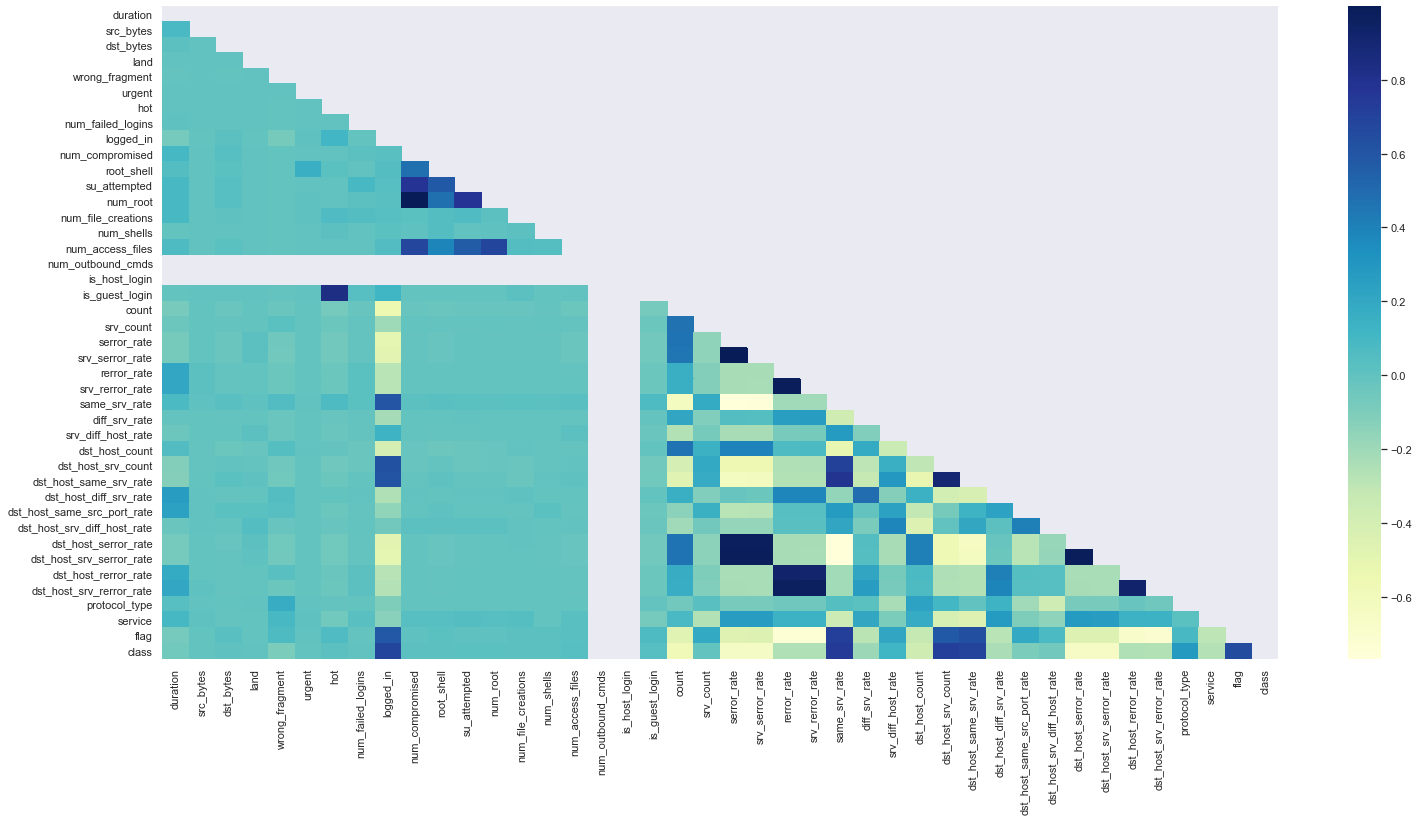

In [90]:
# creating mask
mask = np.triu(np.ones_like(corr_train.corr()))
# Need to make bigger
sns.set(rc={'figure.figsize':(25, 12)})
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(corr_train.corr(), cmap="YlGnBu", annot=False, mask=mask)

We can see that some variables to correlate positively or nagatively with our target variable.

Below we can see the features that have greater than 20% correlation (positive and negative):

In [98]:
corr_y = pd.DataFrame(corr_train.corrwith(corr_train['class']), columns=['corr']).sort_values(by='corr')
corr_y = corr_y[(corr_y['corr']>0.20)|(corr_y['corr']<-0.20)]
corr_y

,corr
dst_host_srv_serror_rate,-0.653759
dst_host_serror_rate,-0.651050
serror_rate,-0.649952
srv_serror_rate,-0.647817
count,-0.578790
dst_host_count,-0.368828
service,-0.270494
dst_host_srv_rerror_rate,-0.256999
rerror_rate,-0.256858
dst_host_rerror_rate,-0.256312


#### Feature selection

<AxesSubplot:xlabel='feature'>

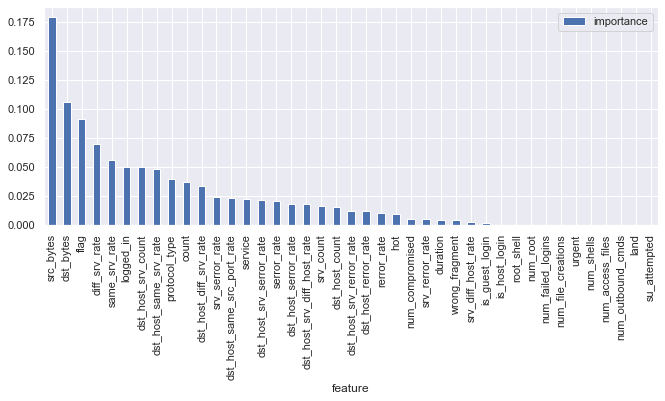

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# fit random forest classifier on the training set
rfc.fit(X_train, y_train)
# extract important features
score = np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X_train.columns,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
# plot importances
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar()

In [105]:
# Features to preserve n cumulative importsance
importances['cumu_imp'] = importances['importance'].cumsum()
orig_feats = len(importances)
n_importance = 0.95
importances = importances[importances['cumu_imp']<=n_importance]
reduced_feats = len(importances)
rfc_feats = list(importances.index)
print(f"Reduction of {(orig_feats-reduced_feats)/orig_feats} or {reduced_feats} features instead of {orig_feats}")
importances

Reduction of 0.4878048780487805 or 21 features instead of 41


,importance,cumu_imp
feature,,
src_bytes,0.179,0.179
dst_bytes,0.106,0.285
flag,0.091,0.376
diff_srv_rate,0.070,0.446
same_srv_rate,0.056,0.502
logged_in,0.050,0.552
dst_host_srv_count,0.050,0.602
dst_host_same_srv_rate,0.048,0.650
protocol_type,0.039,0.689


In [106]:
# Recursive feature elimination set to the same number of features givesrfe_
rfe_feats = rfeSelctor(X_train, y_train, len(rfc_feats))
print(f"The features in rfe that are not in the rf feature selection are: {set(rfc_feats)-set(rfe_feats)}")
print("--------------------------------")
print(f"The features in rfe that are not in the rf feature selection are: {set(rfe_feats)-set(rfc_feats)}")

The features in rfe that are not in the rf feature selection are: {'srv_serror_rate', 'dst_host_srv_rerror_rate'}
--------------------------------
The features in rfe that are not in the rf feature selection are: {'hot', 'dst_host_rerror_rate'}


This gives us a little confidence that the features selected by both methods are similar

In [107]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train_pca = pd.DataFrame(pca.transform(X_train))
print(f"PCA at 0.95 retained variance suggests {len(X_train_pca.columns)} features")

PCA at 0.95 retained variance suggests 8 features


#### Creating a validation set for model selection

In [108]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.20, random_state=2, stratify=y_train)

print(f"The shape of the training set is {X_train.shape} features and {y_train.shape} labels")
print("------------------------------------------------")
print(f"The shape of the validation set is {X_valid.shape} features and {y_valid.shape} labels")

The shape of the training set is (20153, 41) features and (20153,) labels
------------------------------------------------
The shape of the validation set is (5039, 41) features and (5039,) labels


#### Fitting several candidate models

In [109]:
from sklearn.svm import SVC 
from sklearn.naive_bayes import BernoulliNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Train KNeighborsClassifier Model
KNN_Classifier = KNeighborsClassifier(n_jobs=-1)
KNN_Classifier.fit(X_train, y_train); 

# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, y_train)
            
# Train Decision Tree Model
DTC_Classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
DTC_Classifier.fit(X_train, y_train)

# Train Decision Tree Model
RFC_Classifier = RandomForestClassifier(criterion='entropy', random_state=0)
RFC_Classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [110]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, roc_auc_score

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('KNeighborsClassifier', KNN_Classifier))
models.append(('LogisticRegression', LGR_Classifier))
models.append(('RandomForestClassifier', RFC_Classifier))

perf_dict = dict()

for i, v in models:
    pickle.dump(v, open(f'model\{i}.sav', 'wb'))
    scores = cross_val_score(v, X_valid, y_valid, cv=5)
    y_pred = v.predict(X_valid)
    roc_socre = roc_auc_score(y_valid, v.predict_proba(X_valid)[:, 1])
    accuracy = accuracy_score(y_valid, y_pred)
    f1 = f1_score(y_valid, y_pred)
    conf_mat = confusion_matrix(y_valid, y_pred)
    classification = classification_report(y_valid, y_pred)
    perf_dict[i] = {
        'acc': accuracy,
        'cv_score': scores.mean(),
        'tp': conf_mat[0][0],
        'fp': conf_mat[0][1],
        'fn': conf_mat[1][0],
        'tn': conf_mat[1][1],
        'roc': roc_socre,
        'f1': f1
    }
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", conf_mat)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Naive Baye Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9071247300641542

Model Accuracy:
 0.9081166898194086

Confusion matrix:
 [[1999  350]
 [ 113 2577]]

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.85      0.90      2349
           1       0.88      0.96      0.92      2690

    accuracy                           0.91      5039
   macro avg       0.91      0.90      0.91      5039
weighted avg       0.91      0.91      0.91      5039



============================== Decision Tree Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9914676628678615

Model Accuracy:
 0.9958325064496923

Confusion matrix:
 [[2339   10]
 [  11 2679]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2349
           1       1.00      1.00     

In [111]:
pd.DataFrame(perf_dict).T.sort_values(by=('cv_score'), ascending=False)

,acc,cv_score,tp,fp,fn,tn,roc,f1
RandomForestClassifier,0.997023,0.994443,2338.0,11.0,4.0,2686.0,0.999940,0.997216
Decision Tree Classifier,0.995833,0.991468,2339.0,10.0,11.0,2679.0,0.995827,0.996096
KNeighborsClassifier,0.991070,0.981941,2317.0,32.0,13.0,2677.0,0.997238,0.991665
LogisticRegression,0.952173,0.950984,2192.0,157.0,84.0,2606.0,0.987924,0.955804
Naive Baye Classifier,0.908117,0.907125,1999.0,350.0,113.0,2577.0,0.955202,0.917572


#### Tune hyper params - best model

In [112]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 20, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 20, 50, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 8, 16, 32, 64]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [113]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_random = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf_random, param_distributions = random_grid, n_iter = 50, cv = 5, verbose=1, random_state=42)
# Fit the random search model
rf_random.fit(X_train, y_train)
# Evaluate performance
#scores = cross_val_score(rf_random, X_valid, y_valid, cv=5)
y_pred = rf_random.predict(X_valid)
roc_socre = roc_auc_score(y_valid, rf_random.predict_proba(X_valid)[:, 1])
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
conf_mat = confusion_matrix(y_valid, y_pred)
classification = classification_report(y_valid, y_pred)
perf_dict['rf_tuned'] = {
    'acc': accuracy,
    'cv_score': rf_random.cv_results_['mean_test_score'],
    'tp': conf_mat[0][0],
    'fp': conf_mat[0][1],
    'fn': conf_mat[1][0],
    'tn': conf_mat[1][1],
    'roc': roc_socre,
    'f1': f1
}

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits
Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [118]:
pickle.dump(rf_random, open(r'models\rf_tuned.sav', 'wb'))

In [119]:
pd.DataFrame(perf_dict).T.sort_values(by=('cv_score'), ascending=False)

,acc,cv_score,tp,fp,fn,tn,roc,f1
rf_tuned,0.996825,0.994641,2336.0,13.0,3.0,2687.0,0.999952,0.997032
RandomForestClassifier,0.997023,0.994443,2338.0,11.0,4.0,2686.0,0.999940,0.997216
Decision Tree Classifier,0.995833,0.991468,2339.0,10.0,11.0,2679.0,0.995827,0.996096
KNeighborsClassifier,0.991070,0.981941,2317.0,32.0,13.0,2677.0,0.997238,0.991665
LogisticRegression,0.952173,0.950984,2192.0,157.0,84.0,2606.0,0.987924,0.955804
Naive Baye Classifier,0.908117,0.907125,1999.0,350.0,113.0,2577.0,0.955202,0.917572


In [120]:
import tensorflow as tf
from tensorflow import keras
tf.__version__
keras.__version__

'2.4.0'

In [139]:
train_feats = len(X_train.columns)
train_labels = 2

In [140]:
# ANN
model = keras.models.Sequential()
#model.add(keras.layers.Flatten(input_shape=train_feats))
model.add(keras.layers.Dense(train_feats, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(train_labels, activation="softmax"))

In [141]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

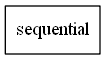

In [142]:
keras.utils.plot_model(model, "ann_model.png", show_shapes=True)

In [150]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [151]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
630/630 [==============================] - 1s 1ms/step - loss: 0.2348 - accuracy: 0.9149 - val_loss: 0.1705 - val_accuracy: 0.9512
Epoch 2/30
630/630 [==============================] - 1s 1ms/step - loss: 0.1354 - accuracy: 0.9531 - val_loss: 0.2136 - val_accuracy: 0.9260
Epoch 3/30
630/630 [==============================] - 1s 1ms/step - loss: 0.1175 - accuracy: 0.9597 - val_loss: 0.1040 - val_accuracy: 0.9669
Epoch 4/30
630/630 [==============================] - 1s 1ms/step - loss: 0.1057 - accuracy: 0.9625 - val_loss: 0.1068 - val_accuracy: 0.9665
Epoch 5/30
630/630 [==============================] - 1s 1ms/step - loss: 0.0979 - accuracy: 0.9653 - val_loss: 0.1017 - val_accuracy: 0.9617
Epoch 6/30
630/630 [==============================] - 1s 2ms/step - loss: 0.0901 - accuracy: 0.9680 - val_loss: 0.1052 - val_accuracy: 0.9597
Epoch 7/30
630/630 [==============================] - 1s 2ms/step - loss: 0.0852 - accuracy: 0.9685 - val_loss: 0.0819 - val_accuracy: 0.9661
Epoch 

In [145]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 41)                1722      
_________________________________________________________________
dense_1 (Dense)              (None, 300)               12600     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 202       
Total params: 44,624
Trainable params: 44,624
Non-trainable params: 0
_________________________________________________________________


NameError: name 'save_fig' is not defined

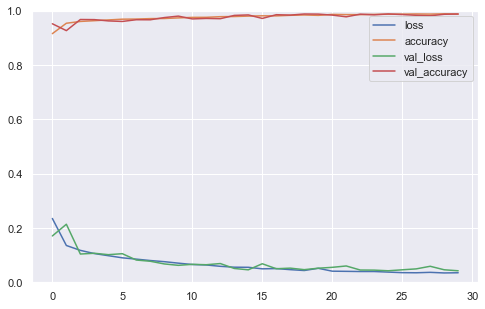

In [152]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")

In [147]:
y_pred = model.predict(X_valid)
roc_socre = roc_auc_score(y_valid, model.predict_proba(X_valid)[:, 1])
accuracy = accuracy_score(y_valid, y_pred)
f1 = f1_score(y_valid, y_pred)
conf_mat = confusion_matrix(y_valid, y_pred)
classification = classification_report(y_valid, y_pred)
perf_dict['ann'] = {
    'acc': accuracy,
    'cv_score': model.cv_results_['mean_test_score'],
    'tp': conf_mat[0][0],
    'fp': conf_mat[0][1],
    'fn': conf_mat[1][0],
    'tn': conf_mat[1][1],
    'roc': roc_socre,
    'f1': f1
}

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets